          airline airline_sentiment  airline_sentiment_confidence  \
0  Virgin America          positive                        0.3486   
1  Virgin America           neutral                        0.6837   
2  Virgin America          negative                        1.0000   
3  Virgin America          negative                        1.0000   
4  Virgin America          negative                        1.0000   

  negativereason              tweet_created  \
0        Unknown  2015-02-24 11:15:59-08:00   
1        Unknown  2015-02-24 11:15:48-08:00   
2     Bad Flight  2015-02-24 11:15:36-08:00   
3     Can't Tell  2015-02-24 11:14:45-08:00   
4     Can't Tell  2015-02-24 11:14:33-08:00   

                                          clean_text  tweet_year  tweet_month  \
0  plus youve added commercials to the experience...        2015            2   
1  i didnt today must mean i need to take another...        2015            2   
2  its really aggressive to blast obnoxious enter...       

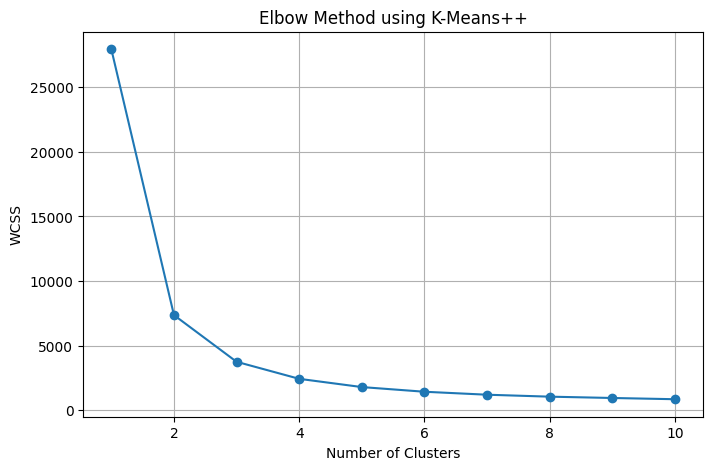

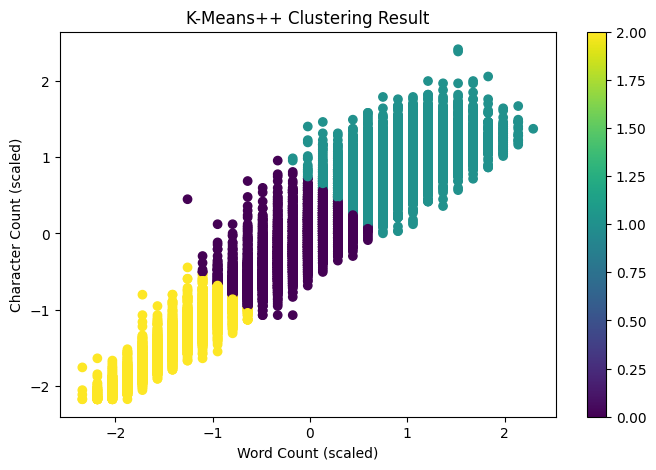

,word_count,char_count,cluster
0,8,52,2
1,11,51,2
2,16,105,0
3,9,39,2
4,21,113,1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/twitter_airline_sentiment_clean.csv')

print(df.head())
print(df.info())

# Select features
X = df[['word_count', 'char_count']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method using K-Means++')
plt.grid()
plt.show()

# Train final model
k = 3
kmeans = KMeans(
    n_clusters=k,
    init='k-means++',
    random_state=42,
    n_init=10
)

df['cluster'] = kmeans.fit_predict(X_scaled)

# Cluster visualization
plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=df['cluster']
)
plt.xlabel('Word Count (scaled)')
plt.ylabel('Character Count (scaled)')
plt.title('K-Means++ Clustering Result')
plt.colorbar(scatter)
plt.show()

# View clustered data
df[['word_count', 'char_count', 'cluster']].head()
